In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# set parameters
ga  = 0.2
Gam = 1.2
Om  = 0.5
c   = 0.79
tend = 100000

# Define the system of differential equations
def couplo_ode(t, y):
    dydt = [y[1], 
            -ga*y[1] - np.sin(y[0]) + Gam*np.cos(Om*t) + c*(np.sin(y[0]) - np.sin(y[2]))/2,
            y[3],
            -(ga+1e-10)*y[3] - np.sin(y[2]) + (Gam)*np.cos(Om*t) + c*(np.sin(y[2]) - np.sin(y[0]))/2]
    return dydt

# Solve the differential equations
sol = solve_ivp(couplo_ode, [0, tend], [0.1, 0.1, 0.1, 0.1], method='RK45', t_eval=np.linspace(0, tend, 1000))

# Calculate dif and eta
dif = np.sqrt((sol.y[0, :] - sol.y[2, :])**2 + (sol.y[1, :] - sol.y[3, :])**2)
eta = np.log(dif + 1e-10)  # Add a small constant to avoid taking log of zero

# Plot dif
plt.figure()
plt.plot(sol.t, dif)
plt.xlabel('t')
plt.ylabel('eta(t)')

# Plot histogram
plt.figure()
yn, xn = np.histogram(eta, 50)
xn = 0.5*(xn[1:] + xn[:-1])  # calculate midpoints of bins
yn = yn / np.trapz(yn, xn)
plt.semilogy(xn, yn, 'ob')
plt.xlabel('eta')
plt.ylabel('P(eta)')

# Plot y
plt.figure()
plt.plot(sol.t, sol.y[0, :], sol.t, sol.y[2, :])

# Plot y dot
plt.figure()
plt.plot(sol.t, sol.y[1, :], sol.t, sol.y[3, :])

C:\Users\Ali\AppData\Local\Temp\ipykernel_27744\3336791446.py:26: RuntimeWarning: divide by zero encountered in log
  eta = np.log(dif)


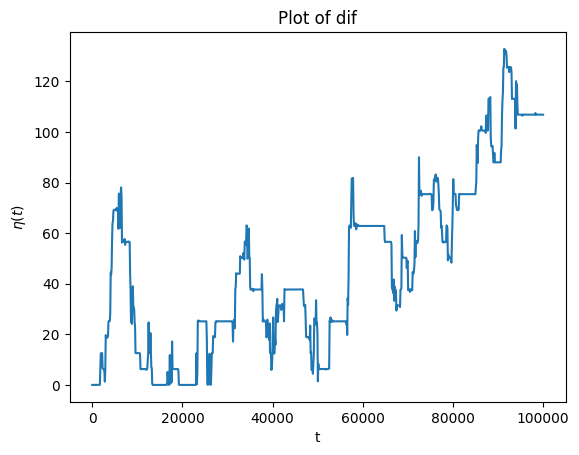

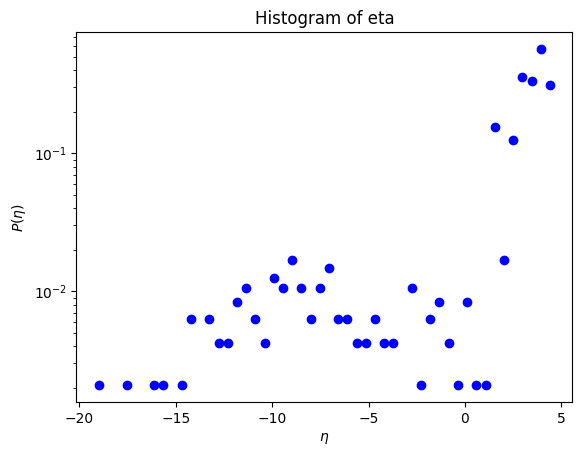

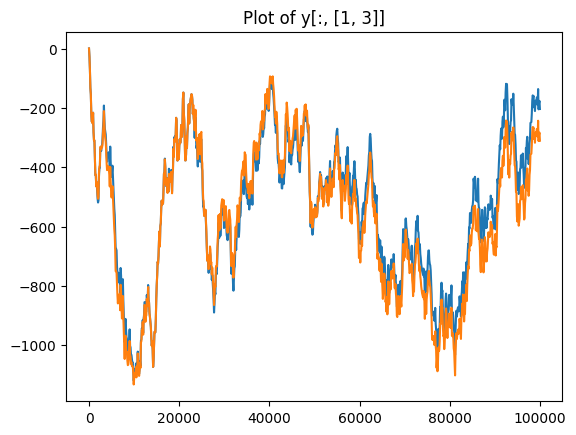

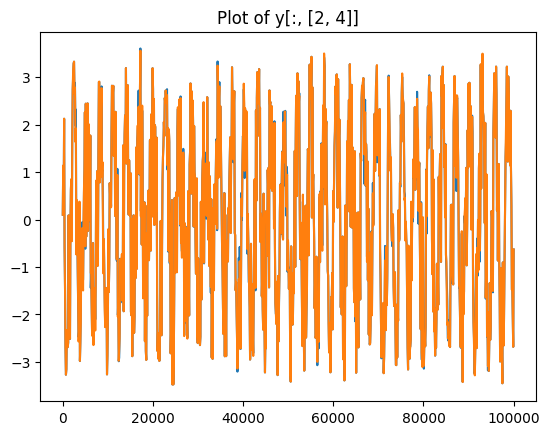

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Set parameters
ga = 0.2
Gam = 1.2
Om = 0.5
c = 0.79
tend = 100000

# Define the differential equations
def couplode(t, y):
    return [y[1], 
            -ga*y[1] - np.sin(y[0]) + Gam*np.cos(Om*t) + c*(np.sin(y[0]) - np.sin(y[2]))/2,
            y[3], 
            -(ga + 1e-10)*y[3] - np.sin(y[2]) + Gam*np.cos(Om*t) + c*(np.sin(y[2]) - np.sin(y[0]))/2]

# Solve the differential equations
t_span = (0, tend)
y0 = [0.1, 0.1, 0.1, 0.1]
sol = solve_ivp(couplode, t_span, y0, method='RK45', t_eval=np.linspace(0, tend, 1000))

# Compute dif and eta
dif = np.sqrt((sol.y[0] - sol.y[2])**2 + (sol.y[1] - sol.y[3])**2)
eta = np.log(dif)

# Plotting dif
plt.figure()
plt.plot(sol.t, dif)
plt.ylabel(r'$\eta(t)$')
plt.xlabel('t')
plt.title('Plot of dif')
plt.show()

# Ensure dif values are above a small threshold before taking the log
threshold = 1e-10
filtered_dif = dif[dif > threshold]
eta = np.log(filtered_dif)

# Plotting histogram of eta
# Check if eta is not empty
if eta.size > 0:
    yn, xn = np.histogram(eta, bins=50, density=True)
    plt.figure()
    plt.semilogy(xn[:-1], yn, 'ob')
    plt.xlabel(r'$\eta$')
    plt.ylabel(r'$P(\eta)$')
    plt.title('Histogram of eta')
    plt.show()
else:
    print("No valid data to plot histogram of eta.")


# Plotting y[:, [1, 3]] and y[:, [2, 4]]
plt.figure()
plt.plot(sol.t, sol.y[[0, 2]].T)
plt.title('Plot of y[:, [1, 3]]')
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[[1, 3]].T)
plt.title('Plot of y[:, [2, 4]]')
plt.show()
